In [35]:
from smac.intensifier.successive_halving import SuccessiveHalving
import numpy as np

total_budget = 10_000_000
min_budget = 1000
max_budget = 100000  # R
eta = 3

_s_max = SuccessiveHalving._get_max_iterations(eta, max_budget, min_budget)

_max_iterations: dict[int, int] = {}
_n_configs_in_stage: dict[int, list] = {}
_budgets_in_stage: dict[int, list] = {}

for i in range(_s_max + 1):
    max_iter = _s_max - i

    _budgets_in_stage[i], _n_configs_in_stage[i] = SuccessiveHalving._compute_configs_and_budgets_for_stages(
        eta, max_budget, max_iter, _s_max
    )
    _max_iterations[i] = max_iter + 1


total_trials = np.sum([np.sum(v) for v in _n_configs_in_stage.values()])
total_budget = np.sum([np.sum(v) for v in _budgets_in_stage.values()])

print("n_brackets", _s_max)
print("budgets per stage", _budgets_in_stage)
print("n configs per stage", _n_configs_in_stage)
print("total number of trials", total_trials)
print("total budget",  total_budget)



n_brackets 6
budgets per stage {0: [1371.7421124828531, 4115.22633744856, 12345.679012345678, 37037.03703703704, 111111.11111111111, 333333.3333333333, 1000000.0], 1: [4115.22633744856, 12345.679012345678, 37037.03703703704, 111111.11111111111, 333333.3333333333, 1000000.0], 2: [12345.679012345678, 37037.03703703704, 111111.11111111111, 333333.3333333333, 1000000.0], 3: [37037.03703703704, 111111.11111111111, 333333.3333333333, 1000000.0], 4: [111111.11111111111, 333333.3333333333, 1000000.0], 5: [333333.3333333333, 1000000.0], 6: [1000000.0]}
n configs per stage {0: [729, 243, 81, 27, 9, 3, 0], 1: [284, 94, 31, 10, 3, 1], 2: [114, 38, 12, 4, 1], 3: [48, 16, 5, 1], 4: [21, 7, 2], 5: [11, 3], 6: [7]}
total number of trials 1805
total budget 9750342.935528122


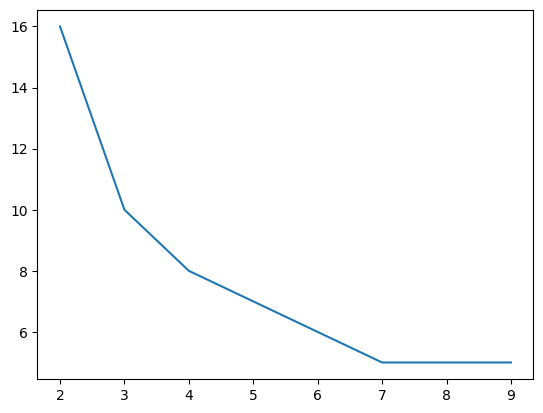

In [14]:
x = np.arange(2,10)
y = [SuccessiveHalving._get_max_iterations(_x, 100000, 1) for _x in x]

import matplotlib.pyplot as plt
plt.plot(x, y)